# Suport Vector Machine PCA

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
%matplotlib inline

from sklearn.svm import SVC #import support vector machine classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA


In [2]:
import src.data_set_image_manip
from src.data import Data 
from src.plothelp import *

In [3]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

In [4]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

Let's try to reduce the image even further using PCA analysis:

In [5]:
n_components = 150

start = time.time()
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

end = time.time()
elapsed = end - start
print("PCA compleated in  ", elapsed, "seconds")

PCA compleated in   22.239171266555786 seconds
Best estimator found by grid search:


In [6]:
start = time.time()

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Classifier trained in  760.6325733661652 seconds
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Confusion matrix, without normalization
[[84 22 26 12]
 [33 82 25 18]
 [18 11 68 12]
 [ 4 12 12 83]]


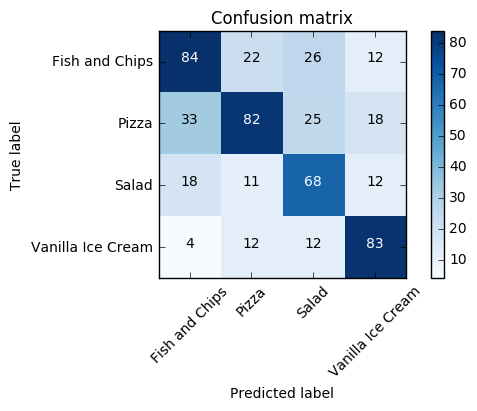

In [13]:
y =clf.predict(X_test_pca)
matrix = confusion_matrix(y,y_test)
plot_confusion_matrix(matrix,clf.best_estimator_.classes_)

In [9]:
print(classification_report(y, y_test))
print(accuracy_score(y, y_test)*100,"%")

                   precision    recall  f1-score   support

   Fish and Chips       0.60      0.58      0.59       144
            Pizza       0.65      0.52      0.58       158
            Salad       0.52      0.62      0.57       109
Vanilla Ice Cream       0.66      0.75      0.70       111

      avg / total       0.61      0.61      0.61       522

60.7279693487 %


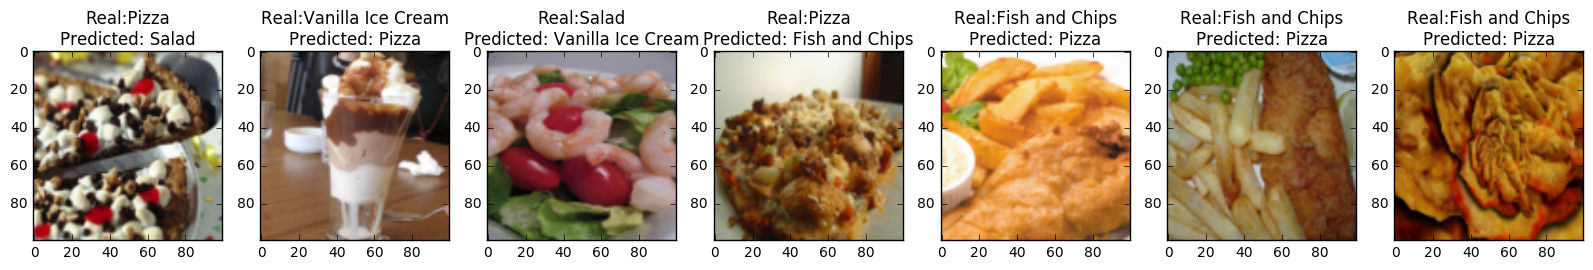

In [16]:
plot_misclassified(X_test, y_test, y, 7)